In [2]:
#importando as bibliotecas
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_excel('./valores.xlsx')

In [34]:
df.head()

,Data,Valores
0,2021-01-01,11919
1,2021-02-01,10077
2,2021-03-01,11791
3,2021-04-01,9485
4,2021-05-01,10756


In [47]:
df['m2'] = df['Valores'].rolling(2).mean()
df['m5'] = df['Valores'].rolling(5).mean()

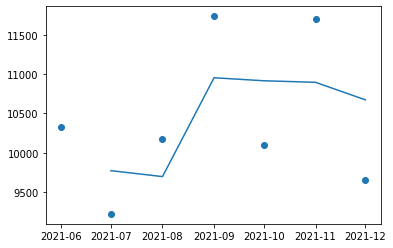

In [51]:
plt.scatter(df['Data'],df['Valores'])
plt.plot(df['Data'],df['m2'])

In [46]:
df.to_excel('./saida.xlsx')

df.head()
df.dropna(inplace=True)

In [38]:
#verificando quantidade de linhas
qtd_linhas = len(df)

qtd_linhas_treino= round(.70 * qtd_linhas)
qtd_linhas_teste= qtd_linhas - qtd_linhas_treino  
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:8 linhas teste= 8:10 linhas validação= 10'

In [39]:
variaveis = ['m2']
features = df[variaveis]
labels= df['Valores']


In [40]:
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

8 8
2 2


In [41]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [42]:
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:-2.43'

In [43]:
valor_novo = features.tail(1)
valor_novo

,m2
11,10673.0


In [44]:

previsao=scaler.transform(valor_novo)


pred=lr.predict(previsao)

pred

array([10648.03445406])